In [34]:
from src.elegant_fuzzy_genetic_algorithms.helpers.generalized_param_inferrer import GeneralizedParamInferencer, generate_rules_parameter_inference
from src.elegant_fuzzy_genetic_algorithms.helpers.parallel_priority_wrapper import ParallelPriorityWrapper
# from src.common.visualization import plot

import multiprocessing as mp
import numpy as np

In [19]:
g_priority = ParallelPriorityWrapper(3)

In [20]:
from src.elegant_fuzzy_genetic_algorithms.helpers.param_inference import ParamInference

In [21]:
pi = ParamInference(rule_path_param='src/elegant_fuzzy_genetic_algorithms/rulesets/ruleset_params.txt', 
                    rule_path_priority='src/elegant_fuzzy_genetic_algorithms/rulesets/ruleset_priorityt.txt')

In [31]:
from matplotlib import pyplot as plt
def plot_variable(var, universe=None):
    if universe is None:
        universe = (var.minimum, var.maximum)
    plt.title(var.name)
    linguistic_terms_names = []
    vals = np.linspace(*universe, 100)
    
        
    for term in var.terms:
        membership_fn = [term.membership(e) for e in vals]
        plt.plot(vals, membership_fn)
        linguistic_terms_names.append(term.name)
    plt.legend(linguistic_terms_names)
    plt.xlabel(var.name)
    plt.ylabel('membership function')
    plt.show()

In [35]:
generate_rules_parameter_inference(5)

['if  bestFitness is last_bin  then  xRate is last_bin',
 'if  avgFitness is first_bin  then  xRate is first_bin',
 'if  bestFitness is last_bin  then  mRate is last_bin',
 'if  avgFitness is first_bin  then  mRate is first_bin',
 'if  bestFitness is last_bin  then  subPopSize is last_bin',
 'if  avgFitness is first_bin  then  subPopSize is first_bin',
 'if  avgFitChange is first_bin   and  avgFitness is last_bin  then  xRate is last_bin',
 'if  avgFitChange is first_bin   and  avgFitness is last_bin  then  mRate is last_bin',
 'if  avgFitChange is first_bin   and  avgFitness is last_bin  then  subPopSize is last_bin',
 'if  avgFitChange is first_bin   and  avgFitness is bin_4  then  xRate is bin_4',
 'if  avgFitChange is first_bin   and  avgFitness is bin_4  then  mRate is bin_4',
 'if  avgFitChange is first_bin   and  avgFitness is bin_4  then  subPopSize is bin_4',
 'if  avgFitChange is first_bin   and  avgFitness is bin_3  then  xRate is bin_3',
 'if  avgFitChange is first_bin   an

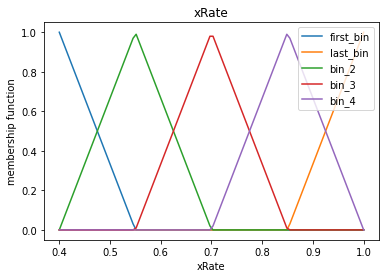

In [32]:
g_params = GeneralizedParamInferencer(5)
plot_variable(g_params.x_rate)


In [36]:
len(g_params.x_rate.terms)

5

In [6]:
for r in g_params.engine.rule_blocks[0].rules:
    print(r.text)

if bestFitness is last_bin then xRate is last_bin
if avgFitness is first_bin then xRate is first_bin
if bestFitness is last_bin then mRate is last_bin
if avgFitness is first_bin then mRate is first_bin
if bestFitness is last_bin then subPopSize is last_bin
if avgFitness is first_bin then subPopSize is first_bin
if avgFitChange is first_bin and avgFitness is last_bin then xRate is last_bin
if avgFitChange is first_bin and avgFitness is last_bin then mRate is last_bin
if avgFitChange is first_bin and avgFitness is last_bin then subPopSize is last_bin
if avgFitChange is first_bin and avgFitness is bin_4 then xRate is bin_4
if avgFitChange is first_bin and avgFitness is bin_4 then mRate is bin_4
if avgFitChange is first_bin and avgFitness is bin_4 then subPopSize is bin_4
if avgFitChange is first_bin and avgFitness is bin_3 then xRate is bin_3
if avgFitChange is first_bin and avgFitness is bin_3 then mRate is bin_3
if avgFitChange is first_bin and avgFitness is bin_3 then subPopSize is bin

In [4]:
class AllEFGAParamsParallelWrapper:
    def __init__(self, n_terms_params: int = 3, n_terms_priority: int = 3, n_processes: int = mp.cpu_count()) -> None:
        self.priority = ParallelPriorityWrapper(n_terms_fitness=n_terms_priority, n_processes=n_processes)
        self.params = GeneralizedParamInferencer(n_terms_params)
    
    def infer_priority(self, c1, c2):
        return self.priority.infer_priority(c1, c2)
    
    def infer(self, bestFitness: float, avgFitness: float, avgFitChange: float) -> float:
        return self.params.infer(bestFitness=bestFitness, avgFitness=avgFitness, avgFitChange=avgFitChange)

In [5]:
aefgpw = AllEFGAParamsParallelWrapper(3, 5)

In [6]:
aefgpw.infer(.5, .99, .01)

{'xRate': 0.8866346153846152,
 'mRate': 0.040552884615384616,
 'subPopSize': 0.21714114285714275}

In [7]:
c1 = np.random.uniform(0,1, 100)
c2 = np.random.uniform(0,1, 100)

In [8]:
priorities = aefgpw.infer_priority(c1, c2)
priorities

array([-0.18495665,  0.54536791, -0.46924286, -0.19573953, -0.26229646,
        0.04600472,  0.38564844, -0.45718733,  0.04288611, -0.29627861,
       -0.50069496, -0.46397611,  0.26305148,  0.17346222,  0.25950609,
        0.32864725,  0.50985775,  0.05169453,  0.08605943, -0.14676437,
        0.09380389, -0.15043721,  0.40544377,  0.03181528,  0.45720557,
        0.10916098,  0.08261382,  0.21356162, -0.14021865,  0.35831851,
       -0.02419718, -0.63887521,  0.0798451 , -0.36238048, -0.44261837,
        0.24156288,  0.39576051,  0.28600903, -0.41054923,  0.45994164,
        0.6663853 , -0.27206833,  0.01914065,  0.02861487, -0.37308159,
       -0.60395594, -0.24031426, -0.24898632, -0.57979865, -0.09708774,
       -0.26129045, -0.0291027 , -0.47724523, -0.30138496, -0.14452461,
        0.61206018, -0.36594049,  0.20965095,  0.10310314, -0.08557938,
       -0.32827623,  0.34865775,  0.04419342,  0.3101038 , -0.24818646,
        0.3446754 ,  0.05223699, -0.28559659,  0.10738484,  0.53

In [11]:
np.repeat(priorities, 2)

array([-0.18495665, -0.18495665,  0.54536791,  0.54536791, -0.46924286,
       -0.46924286, -0.19573953, -0.19573953, -0.26229646, -0.26229646,
        0.04600472,  0.04600472,  0.38564844,  0.38564844, -0.45718733,
       -0.45718733,  0.04288611,  0.04288611, -0.29627861, -0.29627861,
       -0.50069496, -0.50069496, -0.46397611, -0.46397611,  0.26305148,
        0.26305148,  0.17346222,  0.17346222,  0.25950609,  0.25950609,
        0.32864725,  0.32864725,  0.50985775,  0.50985775,  0.05169453,
        0.05169453,  0.08605943,  0.08605943, -0.14676437, -0.14676437,
        0.09380389,  0.09380389, -0.15043721, -0.15043721,  0.40544377,
        0.40544377,  0.03181528,  0.03181528,  0.45720557,  0.45720557,
        0.10916098,  0.10916098,  0.08261382,  0.08261382,  0.21356162,
        0.21356162, -0.14021865, -0.14021865,  0.35831851,  0.35831851,
       -0.02419718, -0.02419718, -0.63887521, -0.63887521,  0.0798451 ,
        0.0798451 , -0.36238048, -0.36238048, -0.44261837, -0.44

In [12]:
a = np.array([1, 2, 3,])
b = np.array([4, 5, 6])

In [14]:
c = np.zeros(a.shape[0] * 2)
c[::2] = a
c[1::2] = b

In [6]:
g_params.infer(.1, 4, .1)

{'xRate': nan, 'mRate': nan, 'subPopSize': nan}